0 [[-0.39673388]
 [ 0.11316863]
 [ 0.05089195]
 [ 0.8471273 ]
 [-0.47488987]
 [ 2.254034  ]] [-0.04447001]
6000 [[-0.39673388]
 [ 0.2927369 ]
 [-0.21335326]
 [ 0.8471273 ]
 [-0.47488987]
 [ 2.254034  ]] [-0.04181783]
12000 [[-0.39673388]
 [ 0.32662   ]
 [-0.262409  ]
 [ 0.8471273 ]
 [-0.47488987]
 [ 2.254034  ]] [-0.04221997]
18000 [[-0.39673388]
 [ 0.3275852 ]
 [-0.28303006]
 [ 0.8471273 ]
 [-0.47488987]
 [ 2.254034  ]] [-0.04320109]
24000 [[-0.39673388]
 [ 0.32008982]
 [-0.29418758]
 [ 0.8471273 ]
 [-0.47488987]
 [ 2.254034  ]] [-0.04436151]

Hypotesis: [[0.09120858]
 [0.04321811]
 [0.80125403]
 [0.02192754]
 [0.6069105 ]
 [0.98886055]
 [0.8396635 ]
 [0.62386864]] 
Correct (Y): [[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy :  0.875
[[-0.39673388]
 [ 0.31049412]
 [-0.30167314]
 [ 0.8471273 ]
 [-0.47488987]
 [ 2.254034  ]] [-0.04560198]


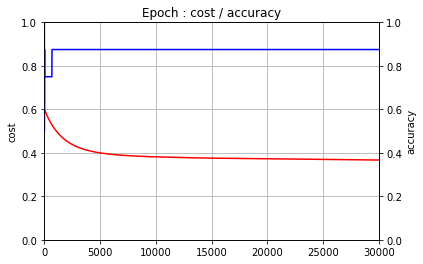

In [112]:
#####################################
#다중 로지스틱스회귀 / 오차역전파 
#######################################
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
tf.disable_v2_behavior()

epoch_arr = []
cost_arr = []
accuracy_arr = []
#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

def graph():
    mpl.rc('axes', unicode_minus = False)
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("Epoch : cost / accuracy")
    ax0.plot(cost_arr, 'r-', label="cost")
    ax0.set_ylabel("cost")
    ax0.axis([0, step_val,0,1])
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="accuracy")
    ax1.set_ylabel("accuracy")
    ax1.grid(False)
    ax1.set_xlabel("epochs")
    ax1.axis([0, step_val,0,1])
    plt.show()

data = pd.read_csv(r"jeju.csv")
data1 = np.array(data)

x_data = data1[:, 2:-1]
y_data = data1[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 6])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.Variable(tf.random_normal([6,6]), name='weight1')
b1 = tf.Variable(tf.random_normal([6]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X,w1) + b1)
w2 = tf.Variable(tf.random_normal([6,1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')

hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2)

step_val = 30000
lr = 0.0001

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(step_val):
        _, h, p, a, c = sess.run([train, hypothesis, predicted, accuracy, cost], feed_dict={X:x_data, Y:y_data})
        
        epoch_arr.append(i)
        cost_arr.append(c)
        accuracy_arr.append(a)

        if i % (step_val/5) == 0:
            print(i, sess.run(w2), sess.run(b2))
            
        h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 
    print(sess.run(w2), sess.run(b2))
graph()

In [97]:
#딥러닝을 구동하는데 필요한 케라스 함수를 불러옴
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#딥러닝 구조를 결정합니다.(모델을 설정하고 실행하는 부분)
model = Sequential()
model.add(Dense(30, input_dim=6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#딥러닝을 실행
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_data,y_data, epochs=500, batch_size=10)

Train on 8 samples
Epoch 1/500
8/8 [==============================] - 0s 124us/sample - loss: 0.5000 - acc: 0.5000
Epoch 2/500
8/8 [==============================] - 0s 0s/sample - loss: 0.5000 - acc: 0.5000
Epoch 3/500
8/8 [==============================] - 0s 0s/sample - loss: 0.5000 - acc: 0.5000
Epoch 4/500
8/8 [==============================] - 0s 0s/sample - loss: 0.5000 - acc: 0.5000
Epoch 5/500
8/8 [==============================] - 0s 125us/sample - loss: 0.5000 - acc: 0.5000
Epoch 6/500
8/8 [==============================] - 0s 0s/sample - loss: 0.5000 - acc: 0.5000
Epoch 7/500
8/8 [==============================] - 0s 125us/sample - loss: 0.5000 - acc: 0.5000
Epoch 8/500
8/8 [==============================] - 0s 125us/sample - loss: 0.5000 - acc: 0.5000
Epoch 9/500
8/8 [==============================] - 0s 125us/sample - loss: 0.5000 - acc: 0.5000
Epoch 10/500
8/8 [==============================] - 0s 125us/sample - loss: 0.5000 - acc: 0.5000
Epoch 11/500
8/8 [==============

8/8 [==============================] - 0s 0s/sample - loss: 0.1288 - acc: 0.8750
Epoch 87/500
8/8 [==============================] - 0s 124us/sample - loss: 0.1287 - acc: 0.8750
Epoch 88/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1287 - acc: 0.8750
Epoch 89/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1286 - acc: 0.8750
Epoch 90/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1283 - acc: 0.8750
Epoch 91/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1280 - acc: 0.8750
Epoch 92/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1277 - acc: 0.8750
Epoch 93/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1274 - acc: 0.8750
Epoch 94/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1273 - acc: 0.8750
Epoch 95/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1272 - acc: 0.8750
Epoch 96/500
8/8 [==============================]

8/8 [==============================] - 0s 0s/sample - loss: 0.1190 - acc: 0.8750
Epoch 171/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1189 - acc: 0.8750
Epoch 172/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1188 - acc: 0.8750
Epoch 173/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1188 - acc: 0.8750
Epoch 174/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1187 - acc: 0.8750
Epoch 175/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1186 - acc: 0.8750
Epoch 176/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1186 - acc: 0.8750
Epoch 177/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1185 - acc: 0.8750
Epoch 178/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1185 - acc: 0.8750
Epoch 179/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1184 - acc: 0.8750
Epoch 180/500
8/8 [========================

8/8 [==============================] - 0s 123us/sample - loss: 0.1149 - acc: 0.8750
Epoch 255/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1149 - acc: 0.8750
Epoch 256/500
8/8 [==============================] - 0s 124us/sample - loss: 0.1148 - acc: 0.8750
Epoch 257/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1148 - acc: 0.8750
Epoch 258/500
8/8 [==============================] - 0s 123us/sample - loss: 0.1148 - acc: 0.8750
Epoch 259/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1147 - acc: 0.8750
Epoch 260/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1147 - acc: 0.8750
Epoch 261/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1147 - acc: 0.8750
Epoch 262/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1146 - acc: 0.8750
Epoch 263/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1146 - acc: 0.8750
Epoch 264/500
8/8 [=====================

8/8 [==============================] - 0s 125us/sample - loss: 0.1125 - acc: 0.8750
Epoch 339/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1125 - acc: 0.8750
Epoch 340/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1124 - acc: 0.8750
Epoch 341/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1124 - acc: 0.8750
Epoch 342/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1124 - acc: 0.8750
Epoch 343/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1124 - acc: 0.8750
Epoch 344/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1123 - acc: 0.8750
Epoch 345/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1123 - acc: 0.8750
Epoch 346/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1123 - acc: 0.8750
Epoch 347/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1123 - acc: 0.8750
Epoch 348/500
8/8 [========================

8/8 [==============================] - 0s 125us/sample - loss: 0.1106 - acc: 0.8750
Epoch 423/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1105 - acc: 0.8750
Epoch 424/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1105 - acc: 0.8750
Epoch 425/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1105 - acc: 0.8750
Epoch 426/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1105 - acc: 0.8750
Epoch 427/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1105 - acc: 0.8750
Epoch 428/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1104 - acc: 0.8750
Epoch 429/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1104 - acc: 0.8750
Epoch 430/500
8/8 [==============================] - 0s 125us/sample - loss: 0.1104 - acc: 0.8750
Epoch 431/500
8/8 [==============================] - 0s 0s/sample - loss: 0.1104 - acc: 0.8750
Epoch 432/500
8/8 [==============================